<a href="https://colab.research.google.com/github/NourhanTamer20/HRAnalytics/blob/main/HR_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [ ]:
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as plt

Import Dataset

In [ ]:
data = pd.read_csv("/content/HR-Employee-Attrition.csv", engine='python')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
dshape=data.shape
dshape

(1470, 35)

Data Cleaning

In [ ]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
#Drop unnecessary columns
dataset = data.drop(["YearsWithCurrManager" , "YearsSinceLastPromotion","WorkLifeBalance","TrainingTimesLastYear","StockOptionLevel","RelationshipSatisfaction","MonthlyRate","MonthlyIncome","JobSatisfaction","Attrition","EmployeeCount","EmployeeNumber","EnvironmentSatisfaction","Over18","PercentSalaryHike","PerformanceRating","DailyRate","HourlyRate","JobInvolvement","JobLevel","StandardHours"] , axis = 1)
dataset.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobRole,MaritalStatus,NumCompaniesWorked,OverTime,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole
0,41,Travel_Rarely,Sales,1,2,Life Sciences,Female,Sales Executive,Single,8,Yes,8,6,4
1,49,Travel_Frequently,Research & Development,8,1,Life Sciences,Male,Research Scientist,Married,1,No,10,10,7
2,37,Travel_Rarely,Research & Development,2,2,Other,Male,Laboratory Technician,Single,6,Yes,7,0,0
3,33,Travel_Frequently,Research & Development,3,4,Life Sciences,Female,Research Scientist,Married,1,Yes,8,8,7
4,27,Travel_Rarely,Research & Development,2,1,Medical,Male,Laboratory Technician,Married,9,No,6,2,2


In [ ]:
dshape2=dataset.shape
dshape2

(1470, 14)

In [ ]:
dt=pd.get_dummies(dataset,columns=["MaritalStatus","Gender","OverTime"],drop_first=True)

In [ ]:
dt

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,JobRole,NumCompaniesWorked,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,MaritalStatus_Married,MaritalStatus_Single,Gender_Male,OverTime_Yes
0,41,Travel_Rarely,Sales,1,2,Life Sciences,Sales Executive,8,8,6,4,0,1,0,1
1,49,Travel_Frequently,Research & Development,8,1,Life Sciences,Research Scientist,1,10,10,7,1,0,1,0
2,37,Travel_Rarely,Research & Development,2,2,Other,Laboratory Technician,6,7,0,0,0,1,1,1
3,33,Travel_Frequently,Research & Development,3,4,Life Sciences,Research Scientist,1,8,8,7,1,0,0,1
4,27,Travel_Rarely,Research & Development,2,1,Medical,Laboratory Technician,9,6,2,2,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Travel_Frequently,Research & Development,23,2,Medical,Laboratory Technician,4,17,5,2,1,0,1,0
1466,39,Travel_Rarely,Research & Development,6,1,Medical,Healthcare Representative,4,9,7,7,1,0,1,0
1467,27,Travel_Rarely,Research & Development,4,3,Life Sciences,Manufacturing Director,1,6,6,2,1,0,1,1
1468,49,Travel_Frequently,Sales,2,3,Medical,Sales Executive,2,17,9,6,1,0,1,0


In [ ]:
Totdata=data.duplicated().sum() ## Will give us a number of duplicates
print(Totdata)
data.drop_duplicates(inplace = True)

0


In [ ]:
print(dataset['MaritalStatus'].value_counts())

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64


In [ ]:
print(dataset['Gender'].value_counts())

Male      882
Female    588
Name: Gender, dtype: int64


In [ ]:
print(dataset['OverTime'].value_counts())

No     1054
Yes     416
Name: OverTime, dtype: int64


In [ ]:
print(dataset['EducationField'].value_counts())

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


In [ ]:
print(dataset['Department'].value_counts())

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


In [ ]:
print(dataset['NumCompaniesWorked'].value_counts())

1    521
0    197
3    159
2    146
4    139
7     74
6     70
5     63
9     52
8     49
Name: NumCompaniesWorked, dtype: int64


<ipython-input-18-09657c501994>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=dataset.corr()


<Axes: >

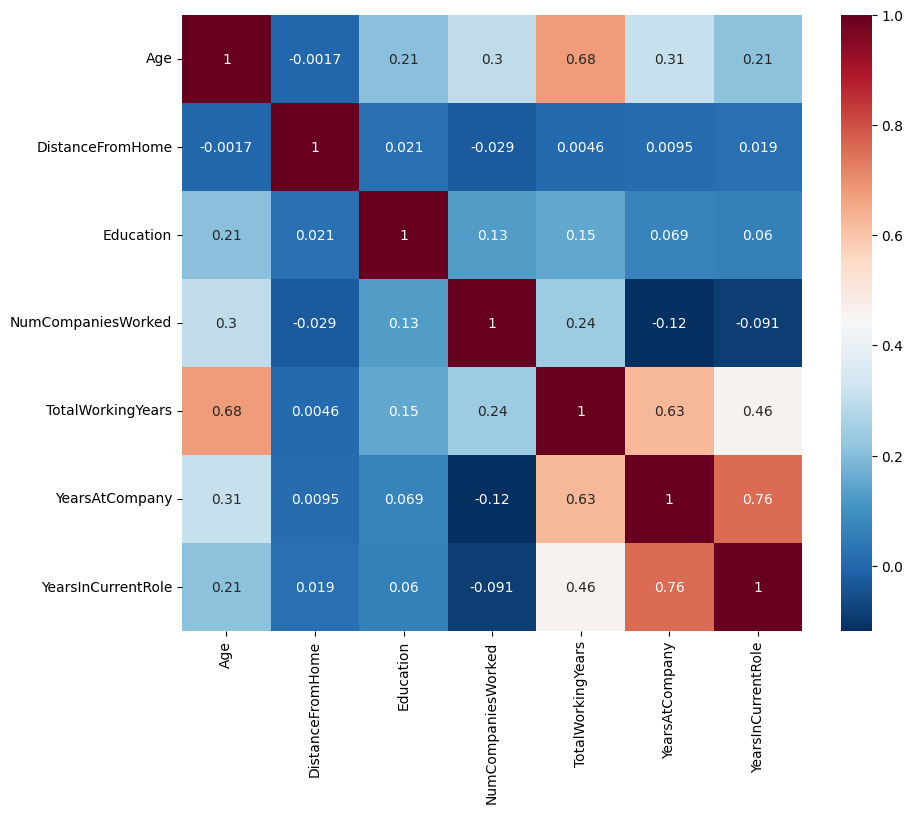

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
corr=dataset.corr()
sns.heatmap(corr,cmap=plt.cm.RdBu_r,annot=True,annot_kws={'size':10})

Data Visualisations

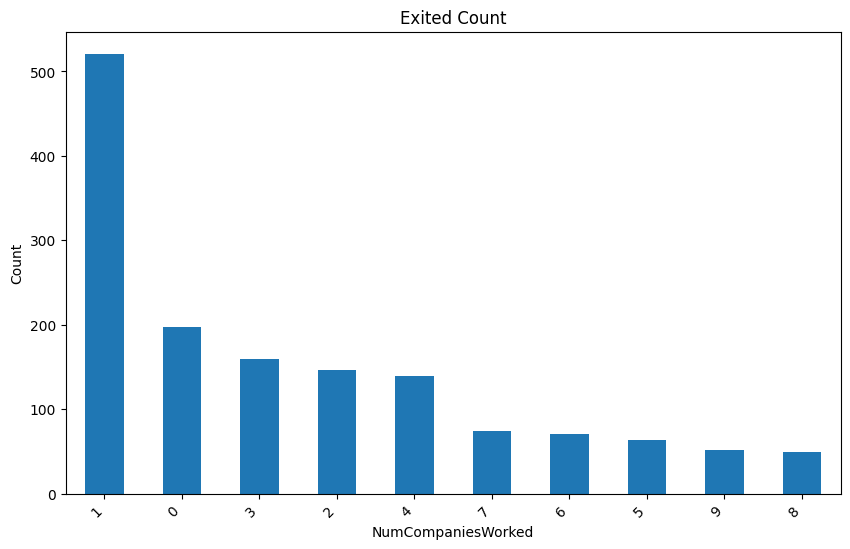

In [ ]:
#import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
Exited_counts = dataset["NumCompaniesWorked"].value_counts()
Exited_counts.plot(kind="bar")
plt.xlabel("NumCompaniesWorked")
plt.ylabel("Count")
plt.title("Exited Count")
plt.xticks(rotation=45, ha='right')
plt.show()

<Axes: ylabel='Gender'>

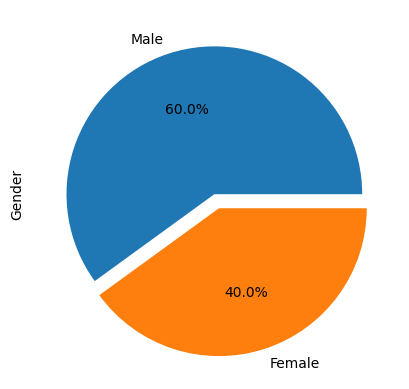

In [ ]:
# Plotting the pie chart for gender
dataset['Gender'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%')

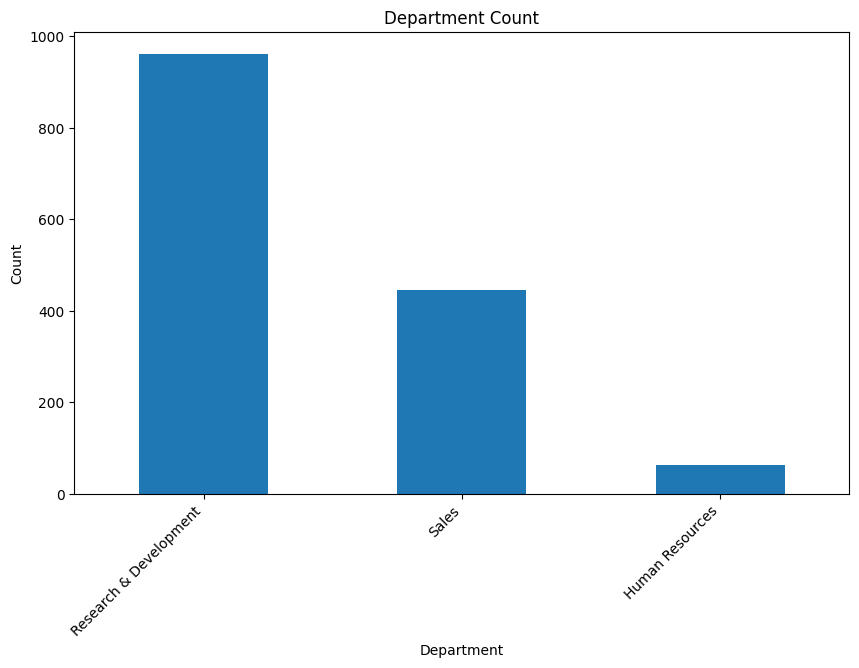

In [ ]:
plt.figure(figsize=(10, 6))
Exited_counts = dataset["Department"].value_counts()
Exited_counts.plot(kind="bar")
plt.xlabel("Department")
plt.ylabel("Count")
plt.title("Department Count")
plt.xticks(rotation=45, ha='right')
plt.show()

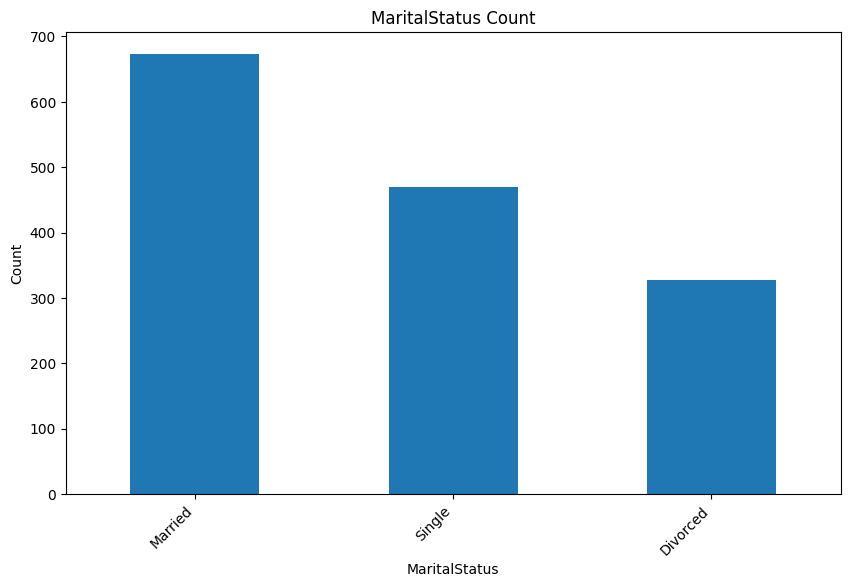

In [ ]:
plt.figure(figsize=(10, 6))
Exited_counts = dataset["MaritalStatus"].value_counts()
Exited_counts.plot(kind="bar")
plt.xlabel("MaritalStatus")
plt.ylabel("Count")
plt.title("MaritalStatus Count")
plt.xticks(rotation=45, ha='right')
plt.show()

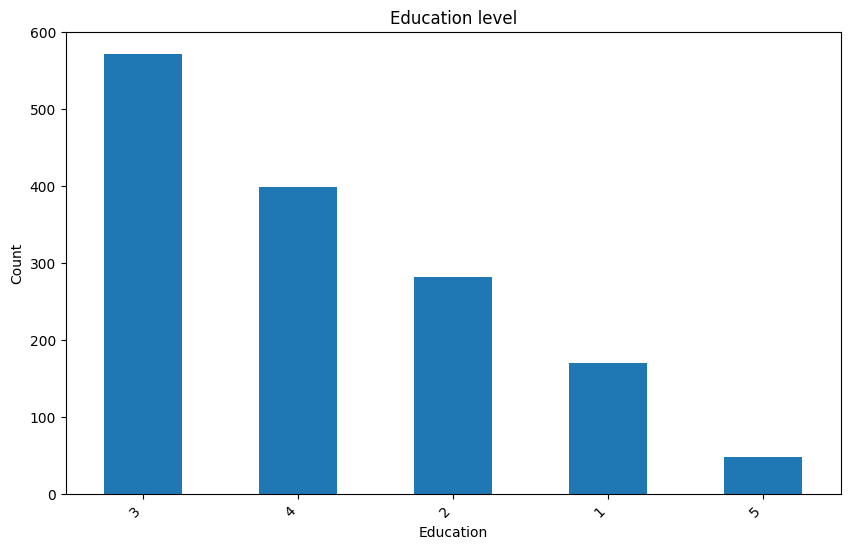

In [ ]:
plt.figure(figsize=(10, 6))
Exited_counts = dataset["Education"].value_counts()
Exited_counts.plot(kind="bar")
plt.xlabel("Education")
plt.ylabel("Count")
plt.title("Education level")
plt.xticks(rotation=45, ha='right')
plt.show()

<Axes: ylabel='JobRole'>

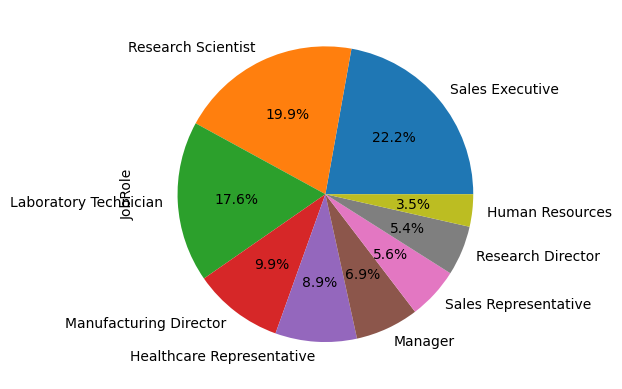

In [ ]:
# Plotting the pie chart for JobRole
dataset['JobRole'].value_counts().plot.pie(autopct='%1.1f%%')

<Axes: ylabel='OverTime'>

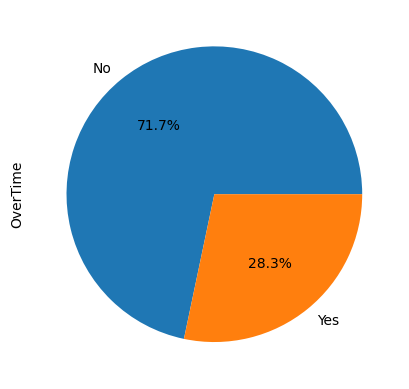

In [ ]:
# Plotting the pie chart for Overtime
dataset['OverTime'].value_counts().plot.pie(autopct='%1.1f%%')

<Axes: ylabel='EducationField'>

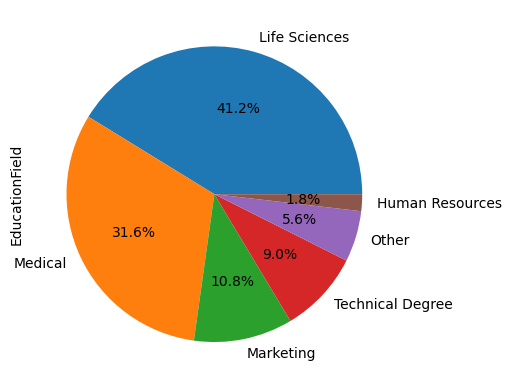

In [ ]:
# Plotting the pie chart for EducationField
dataset['EducationField'].value_counts().plot.pie(autopct='%1.1f%%')

<Axes: ylabel='BusinessTravel'>

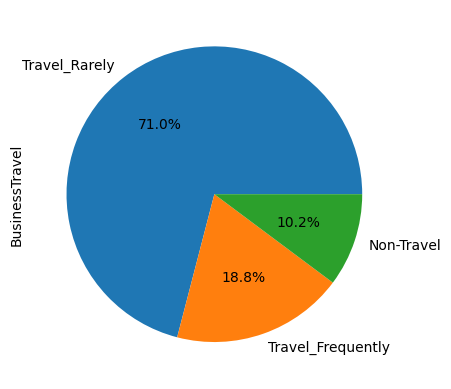

In [ ]:
# Plotting the pie chart for BusinessTravel
dataset['BusinessTravel'].value_counts().plot.pie(autopct='%1.1f%%')

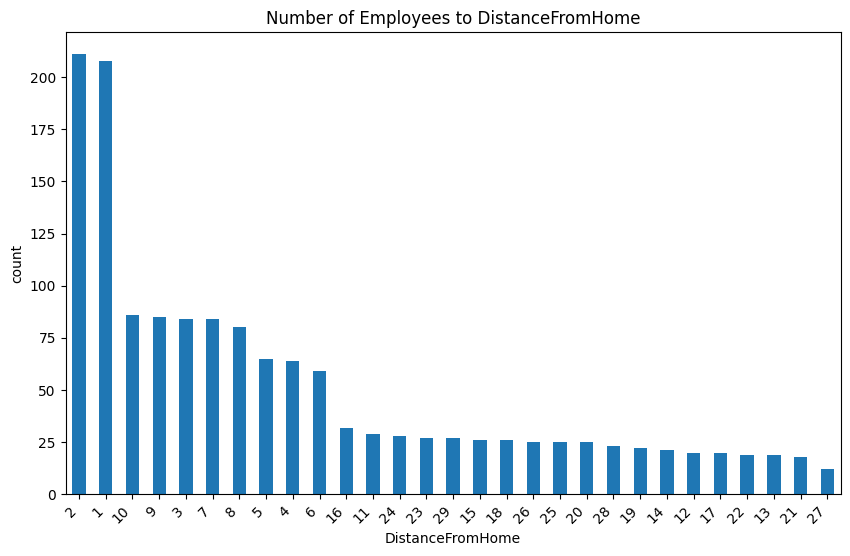

In [38]:
plt.figure(figsize=(10, 6))
Exited_counts = dataset["DistanceFromHome"].value_counts()
Exited_counts.plot(kind="bar")
plt.xlabel("DistanceFromHome")
plt.ylabel("count")
plt.title("Number of Employees to DistanceFromHome")
plt.xticks(rotation=45, ha='right')
plt.show()

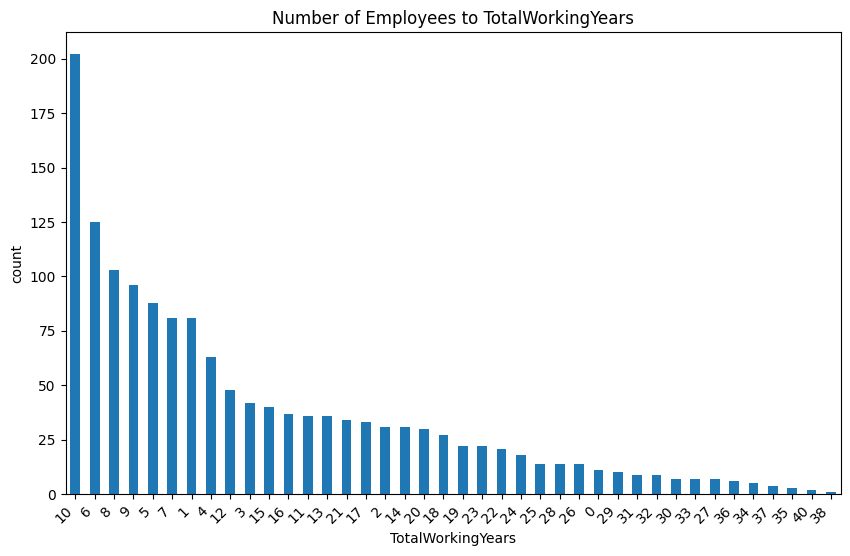

In [37]:
plt.figure(figsize=(10, 6))
Exited_counts = dataset["TotalWorkingYears"].value_counts()
Exited_counts.plot(kind="bar")
plt.xlabel("TotalWorkingYears")
plt.ylabel("count")
plt.title("Number of Employees to TotalWorkingYears")
plt.xticks(rotation=45, ha='right')
plt.show()

In [40]:
cross_tab_prop = pd.crosstab(index=data['OverTime'],
                             columns=data['Age'],
                             normalize="index")
cross_tab_prop

Age,18,19,20,21,22,23,24,25,26,27,...,51,52,53,54,55,56,57,58,59,60
OverTime,,,,,,,,,,,,,,,,,,,,,
No,0.005693,0.004744,0.006641,0.009488,0.008539,0.010436,0.017078,0.017078,0.025617,0.034156,...,0.014231,0.012334,0.013283,0.014231,0.011385,0.010436,0.002846,0.004744,0.006641,0.003795
Yes,0.004808,0.009615,0.009615,0.007212,0.016827,0.007212,0.019231,0.019231,0.028846,0.028846,...,0.009615,0.012019,0.012019,0.007212,0.024038,0.007212,0.002404,0.021635,0.007212,0.002404


In [41]:
cross_tab = pd.crosstab(index=data['OverTime'],
                        columns=data['Age'])
cross_tab

Age,18,19,20,21,22,23,24,25,26,27,...,51,52,53,54,55,56,57,58,59,60
OverTime,,,,,,,,,,,,,,,,,,,,,
No,6,5,7,10,9,11,18,18,27,36,...,15,13,14,15,12,11,3,5,7,4
Yes,2,4,4,3,7,3,8,8,12,12,...,4,5,5,3,10,3,1,9,3,1


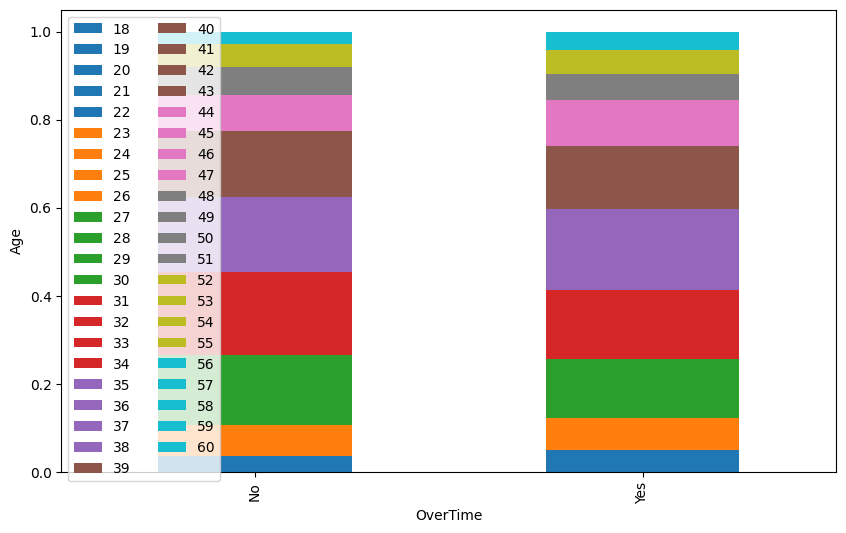

In [42]:
cross_tab_prop.plot(kind='bar',
                    stacked=True,
                    colormap='tab10',
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("OverTime")
plt.ylabel("Age")
plt.show()